#Importing Libraries

In [ ]:
import pandas as pd
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
from sklearn.linear_model import LogisticRegression



import tensorflow as tf
from tensorflow.keras import layers
from matplotlib import pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# The following lines adjust the granularity of reporting. 
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

from google.colab import widgets
# For facets
from IPython.core.display import display, HTML
import base64
!pip install facets-overview==1.0.0
from facets_overview.feature_statistics_generator import FeatureStatisticsGenerator

# Loading Dataset

In [ ]:
drive.mount('/content/drive')
train_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MachineLearning/HousePricesCompetition/data/train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MachineLearning/HousePricesCompetition/data/test.csv")
#test_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MachineLearning/HousePricesCompetition/data/test.csv")

display(train_df.head())

Mounted at /content/drive


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
sample_submission = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MachineLearning/HousePricesCompetition/data/sample_submission.csv")
display(sample_submission.shape)

(1459, 2)

In [ ]:
print("Train dataset shape", train_df.shape)
print("Test dataset shape", test_df.shape)

Train dataset shape (1460, 81)
Test dataset shape (1459, 80)


In [ ]:
# Explore the data
print("Keys of iris_dataset:\n", train_df.keys())


Keys of iris_dataset:
 Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'G

In [ ]:
print("Target names:\n",train_df['SalePrice'].shape)



Target names:
 (1460,)


# Visualization

Se utilizará facets para análizar las características del dataset en su totalidad debido a la dimensionalidad del mismo.
Se prentende, buscar datos, nulos, perdidos con el fin de realizar un filtro de las características que no aportan al alagoritmo de aprendizaje.

In [ ]:
#@title Visualize the Data in Facets
fsg = FeatureStatisticsGenerator()
dataframes = [
    {'table': train_df, 'name': 'trainData'}]
censusProto = fsg.ProtoFromDataFrames(dataframes)
protostr = base64.b64encode(censusProto.SerializeToString()).decode("utf-8")


HTML_TEMPLATE = """<script src="https://cdnjs.cloudflare.com/ajax/libs/webcomponentsjs/1.3.3/webcomponents-lite.js"></script>
        <link rel="import" href="https://raw.githubusercontent.com/PAIR-code/facets/1.0.0/facets-dist/facets-jupyter.html">
        <facets-overview id="elem"></facets-overview>
        <script>
          document.querySelector("#elem").protoInput = "{protostr}";
        </script>"""
html = HTML_TEMPLATE.format(protostr=protostr)
display(HTML(html))

# Cleaning Train Data

## Numerical Features

In [ ]:
#Eliminaremos el porcentaje de filas pequeños cuyos valores estén perdidos o ceros
#pandas.DataFrame.dropna(how="any", axis=0, inplace=True)

#train_df = train_df.dropna(['GarageYrBlt'], axis=0)
#train_df = train_df.dropna(how="any", axis=0)
indexNames = train_df[ train_df['GarageYrBlt'] == 'NA' ].index
# Delete these row indexes from dataFrame
train_df.drop(indexNames , inplace=True)

In [ ]:
# LotFrontage: Linear feet of street connected to property missing value
# MasVnrArea: Masonry veneer area in square 
# BsmtFinSF1: Type 1 finished square feet
# BsmtFinSF2: Type 2 finished square feet
# 2ndFlrSF: Second floor square feet
# LowQualFinSF: Low quality finished square feet (all floors)
# Basement full bathrooms
# BsmtHalfBath: Basement half bathrooms
# HalfBath: Half baths above grade
# Fireplaces: Number of fireplaces
# WoodDeckSF: Wood deck area in square feet
# OpenPorchSF: Open porch area in square feet
# EnclosedPorch: Enclosed porch area in square feet
# 3SsnPorch: Three season porch area in square feet
# ScreenPorch: Screen porch area in square feet
# PoolArea: Pool area in square feet
# MiscVal: $Value of miscellaneous feature
train_df = train_df.drop(['LotFrontage','MasVnrArea', 'BsmtFinSF1','BsmtFinSF2','2ndFlrSF','LowQualFinSF',
                          'BsmtFullBath','BsmtHalfBath','HalfBath','Fireplaces', 'WoodDeckSF', 'OpenPorchSF',
                          'EnclosedPorch', '3SsnPorch', 'ScreenPorch','PoolArea','MiscVal'], axis=1)


##Categorical Features

In [ ]:
#Eliminaremos el porcentaje de filas pequeños cuyos valores estén perdidos o ceros
# BsmtQual: Evaluates the height of the basement
# BsmtCond: Evaluates the general condition of the basement
# BsmtExposure: Refers to walkout or garden level walls
# BsmtFinType1: Rating of basement finished area
# BsmtFinType2: Rating of basement finished area (if multiple types)
# GarageType: Garage location
# GarageFinish: Interior finish of the garage
# GarageQual: Garage quality
# GarageCond: Garage condition
columns = ['BsmtQual', 'BsmtCond','BsmtExposure', 'BsmtFinType1','BsmtFinType2','GarageType','GarageFinish','GarageQual','GarageCond' ]
for feature in columns:
  train_df = train_df[train_df[feature].notna()]



In [ ]:
# Alley: Type of alley access to property
# FireplaceQu: Fireplace quality
# PoolQC: Pool quality
# Fence: Fence quality
# MiscFeature: Miscellaneous feature not covered in other categories
train_df = train_df.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature','MasVnrType'], axis=1)

## Train after cleaning

In [ ]:
fsg = FeatureStatisticsGenerator()
dataframes = [
    {'table': train_df, 'name': 'trainData'}]
censusProto = fsg.ProtoFromDataFrames(dataframes)
protostr = base64.b64encode(censusProto.SerializeToString()).decode("utf-8")


HTML_TEMPLATE = """<script src="https://cdnjs.cloudflare.com/ajax/libs/webcomponentsjs/1.3.3/webcomponents-lite.js"></script>
        <link rel="import" href="https://raw.githubusercontent.com/PAIR-code/facets/1.0.0/facets-dist/facets-jupyter.html">
        <facets-overview id="elem"></facets-overview>
        <script>
          document.querySelector("#elem").protoInput = "{protostr}";
        </script>"""
html = HTML_TEMPLATE.format(protostr=protostr)
display(HTML(html))

# Cleaning Test data

##visualization without cleaning

In [ ]:
#@title Visualize the Data in Facets
fsg = FeatureStatisticsGenerator()
dataframes = [
    {'table': test_df, 'name': 'testData'}]
censusProto = fsg.ProtoFromDataFrames(dataframes)
protostr = base64.b64encode(censusProto.SerializeToString()).decode("utf-8")


HTML_TEMPLATE = """<script src="https://cdnjs.cloudflare.com/ajax/libs/webcomponentsjs/1.3.3/webcomponents-lite.js"></script>
        <link rel="import" href="https://raw.githubusercontent.com/PAIR-code/facets/1.0.0/facets-dist/facets-jupyter.html">
        <facets-overview id="elem"></facets-overview>
        <script>
          document.querySelector("#elem").protoInput = "{protostr}";
        </script>"""
html = HTML_TEMPLATE.format(protostr=protostr)
display(HTML(html))

## Numerical Features

In [ ]:
#Eliminaremos el porcentaje de filas pequeños cuyos valores estén perdidos o ceros
#pandas.DataFrame.dropna(how="any", axis=0, inplace=True)

#test_df = test_df.dropna(['GarageYrBlt'], axis=0)
#test_df = test_df.dropna(how="any", axis=0)
indexNames = test_df[ test_df['GarageYrBlt'] == 'NA' ].index
# Delete these row indexes from dataFrame
test_df.drop(indexNames , inplace=True)

In [ ]:
# LotFrontage: Linear feet of street connected to property missing value
# MasVnrArea: Masonry veneer area in square 
# BsmtFinSF1: Type 1 finished square feet
# BsmtFinSF2: Type 2 finished square feet
# 2ndFlrSF: Second floor square feet
# LowQualFinSF: Low quality finished square feet (all floors)
# Basement full bathrooms
# BsmtHalfBath: Basement half bathrooms
# HalfBath: Half baths above grade
# Fireplaces: Number of fireplaces
# WoodDeckSF: Wood deck area in square feet
# OpenPorchSF: Open porch area in square feet
# EnclosedPorch: Enclosed porch area in square feet
# 3SsnPorch: Three season porch area in square feet
# ScreenPorch: Screen porch area in square feet
# PoolArea: Pool area in square feet
# MiscVal: $Value of miscellaneous feature
test_df = test_df.drop(['LotFrontage','MasVnrArea', 'BsmtFinSF1','BsmtFinSF2','2ndFlrSF','LowQualFinSF',
                          'BsmtFullBath','BsmtHalfBath','HalfBath','Fireplaces', 'WoodDeckSF', 'OpenPorchSF',
                          'EnclosedPorch', '3SsnPorch', 'ScreenPorch','PoolArea','MiscVal'], axis=1)


##Categorical Features

In [ ]:
#Eliminaremos el porcentaje de filas pequeños cuyos valores estén perdidos o ceros
# BsmtQual: Evaluates the height of the basement
# BsmtCond: Evaluates the general condition of the basement
# BsmtExposure: Refers to walkout or garden level walls
# BsmtFinType1: Rating of basement finished area
# BsmtFinType2: Rating of basement finished area (if multiple types)
# GarageType: Garage location
# GarageFinish: Interior finish of the garage
# GarageQual: Garage quality
# GarageCond: Garage condition
columns = ['BsmtQual', 'BsmtCond','BsmtExposure', 'BsmtFinType1','BsmtFinType2','GarageType','GarageFinish','GarageQual','GarageCond' ]
for feature in columns:
  test_df = test_df[test_df[feature].notna()]



In [ ]:
# Alley: Type of alley access to property
# FireplaceQu: Fireplace quality
# PoolQC: Pool quality
# Fence: Fence quality
# MiscFeature: Miscellaneous feature not covered in other categories
test_df = test_df.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature','MasVnrType'], axis=1)

## Test after cleaning

In [ ]:
fsg = FeatureStatisticsGenerator()
dataframes = [
    {'table': test_df, 'name': 'testData'}]
censusProto = fsg.ProtoFromDataFrames(dataframes)
protostr = base64.b64encode(censusProto.SerializeToString()).decode("utf-8")


HTML_TEMPLATE = """<script src="https://cdnjs.cloudflare.com/ajax/libs/webcomponentsjs/1.3.3/webcomponents-lite.js"></script>
        <link rel="import" href="https://raw.githubusercontent.com/PAIR-code/facets/1.0.0/facets-dist/facets-jupyter.html">
        <facets-overview id="elem"></facets-overview>
        <script>
          document.querySelector("#elem").protoInput = "{protostr}";
        </script>"""
html = HTML_TEMPLATE.format(protostr=protostr)
display(HTML(html))

#Original Features training and selecting features : Training

In [ ]:
print("Train dataset shape", train_df.shape)
print("Test dataset shape", test_df.shape)

Train dataset shape (1347, 58)
Test dataset shape (1339, 57)


In [ ]:
print("Keys of iris_dataset:\n", train_df.keys())
train_one_hot = train_df.copy()

Keys of iris_dataset:
 Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', 'GrLivArea', 'FullBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PavedDrive', 'MoSold', 'YrSold',
       'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object')


In [ ]:
print("Keys of iris_dataset:\n", test_df.keys())
test_one_hot = test_df.copy()

Keys of iris_dataset:
 Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', 'GrLivArea', 'FullBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PavedDrive', 'MoSold', 'YrSold',
       'SaleType', 'SaleCondition'],
      dtype='object')


### Linear Models






###Definiendo mi X_train, test_df y Y-targets
Para observar la linealidad de mis características
y valor objetivo

In [ ]:
Y = train_df['SalePrice']

print(Y)


0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1347, dtype: int64


In [ ]:
colsTest = ['MSSubClass','LotArea','OverallQual','OverallCond',
             'YearBuilt','YearRemodAdd','BsmtUnfSF','TotalBsmtSF','1stFlrSF',
             'GrLivArea','FullBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd',
             'GarageYrBlt','GarageCars','GarageArea','MoSold','YrSold']

test_df = test_df[colsTest]


In [ ]:

colsTrain = ['MSSubClass','LotArea','OverallQual','OverallCond',
             'YearBuilt','YearRemodAdd','BsmtUnfSF','TotalBsmtSF','1stFlrSF',
             'GrLivArea','FullBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd',
             'GarageYrBlt','GarageCars','GarageArea','MoSold','YrSold','SalePrice']

X_train = train_df[colsTrain]
X_train.head(10)

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageYrBlt,GarageCars,GarageArea,MoSold,YrSold,SalePrice
0,60,8450,7,5,2003,2003,150,856,856,1710,2,3,1,8,2003.0,2,548,2,2008,208500
1,20,9600,6,8,1976,1976,284,1262,1262,1262,2,3,1,6,1976.0,2,460,5,2007,181500
2,60,11250,7,5,2001,2002,434,920,920,1786,2,3,1,6,2001.0,2,608,9,2008,223500
3,70,9550,7,5,1915,1970,540,756,961,1717,1,3,1,7,1998.0,3,642,2,2006,140000
4,60,14260,8,5,2000,2000,490,1145,1145,2198,2,4,1,9,2000.0,3,836,12,2008,250000
5,50,14115,5,5,1993,1995,64,796,796,1362,1,1,1,5,1993.0,2,480,10,2009,143000
6,20,10084,8,5,2004,2005,317,1686,1694,1694,2,3,1,7,2004.0,2,636,8,2007,307000
7,60,10382,7,6,1973,1973,216,1107,1107,2090,2,3,1,7,1973.0,2,484,11,2009,200000
8,50,6120,7,5,1931,1950,952,952,1022,1774,2,2,2,8,1931.0,2,468,4,2008,129900
9,190,7420,5,6,1939,1950,140,991,1077,1077,1,2,2,5,1939.0,1,205,1,2008,118000


In [ ]:
"""fig = plt.figure(figsize=(15,16))
df = pd.DataFrame(X_train, columns = colsTrain)

cm = np.corrcoef(df[colsTrain].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f',
                 annot_kws={'size': 15},yticklabels=colsTrain, xticklabels=colsTrain)
plt.show()"""

"fig = plt.figure(figsize=(15,16))\ndf = pd.DataFrame(X_train, columns = colsTrain)\n\ncm = np.corrcoef(df[colsTrain].values.T)\nsns.set(font_scale=1.5)\nhm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f',\n                 annot_kws={'size': 15},yticklabels=colsTrain, xticklabels=colsTrain)\nplt.show()"

Con el mapa de calor visto anteriormente se seleccionaran las siguientes características que poseen una linealidad directamente proporcional con el valor de la compra arriba de un 59%

OverallQual




*   TotalBsmtSF
*   1stFlrSF

*   GrLivArea
*   GarageCars
*   GarageArea























In [ ]:
colsTest = ['OverallQual','TotalBsmtSF','1stFlrSF','GrLivArea',
             'GarageCars','GarageArea']

test_df = test_df[colsTest]


colsTrain = ['OverallQual','TotalBsmtSF','1stFlrSF','GrLivArea',
             'GarageCars','GarageArea','SalePrice']
X_train = train_df[colsTrain]
df = pd.DataFrame(X_train, columns = colsTrain)
print("X_train shape:", X_train.shape)

X_train shape: (1347, 7)


In [ ]:
"""sns.set_theme(style="ticks")
sns.pairplot(df, hue="SalePrice")"""

'sns.set_theme(style="ticks")\nsns.pairplot(df, hue="SalePrice")'

 **Definiendo los valores de x_train y validación**


In [ ]:
X_train = X_train.iloc[:, :-1]
X_train.head(10)

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,GarageCars,GarageArea
0,7,856,856,1710,2,548
1,6,1262,1262,1262,2,460
2,7,920,920,1786,2,608
3,7,756,961,1717,3,642
4,8,1145,1145,2198,3,836
5,5,796,796,1362,2,480
6,8,1686,1694,1694,2,636
7,7,1107,1107,2090,2,484
8,7,952,1022,1774,2,468
9,5,991,1077,1077,1,205


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_train, Y, test_size= 0.30, random_state = 0)

###Lineal Ridge Regresion

In [ ]:
#fila 8
X_new = np.array([7,952,1022,1774,2,468], ndmin=2)

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.75
Test set score: 0.77


In [ ]:
ridge = Ridge(alpha=30).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))
y_pred_test = ridge.predict(X_test)
y_pred_new = ridge.predict(X_new)
print("Predicción de X_new %s", y_pred_new) 


Training set score: 0.75
Test set score: 0.77
Predicción de X_new %s [214092.94569249]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
!pip install mglearn

     |████████████████████████████████| 540 kB 5.1 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=a6da82e2f0fd1395ba6f1d978ec7393019f056b317b20b6ff4848d776e891f28
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


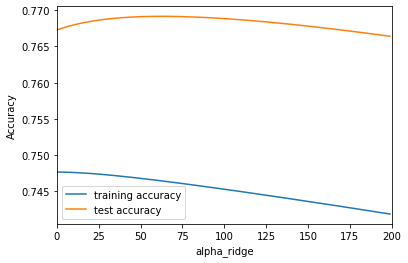

In [ ]:
ridge_training_accuracy = []
ridge_test_accuracy = []
# try n_neighbors from 1 to 10
alpha_ridge_settings =np.arange(0.01, 200)
#vector = [x for x in np.arange(5, 200)]
#print(vector)
for alpha_ridge in alpha_ridge_settings:
    #print(n_neighbors)
    # build the model
    ridge = Ridge(alpha=alpha_ridge)
    ridge.fit(X_train, y_train)
    # record training set accuracy
    ridge_training_accuracy.append(ridge.score(X_train, y_train))
    # record generalization accuracy
    ridge_test_accuracy.append(ridge.score(X_test, y_test))

#print('training_accuracy: ', training_accuracy)
#print('test_accuracy: ', test_accuracy)
plt.plot(alpha_ridge_settings, ridge_training_accuracy, label="training accuracy")
plt.plot(alpha_ridge_settings, ridge_test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("alpha_ridge")
plt.xlim(0, 200)
plt.legend()

## Linear Lasso Regresion

In [ ]:
from sklearn.linear_model import Lasso

# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso001.coef_ != 0))
print("features diferentes de cero:",lasso001.coef_ != 0)
print("Feature names:\n", X_train.keys()[1:-1])

Training set score: 0.75
Test set score: 0.77
Number of features used: 6
features diferentes de cero: [ True  True  True  True  True  True]
Feature names:
 Index(['TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageCars'], dtype='object')


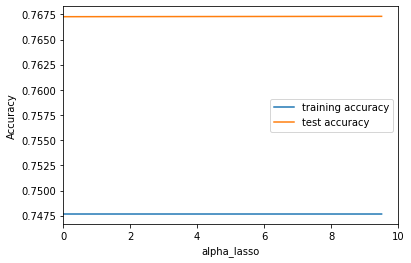

In [ ]:
lasso_training_accuracy = []
lasso_test_accuracy = []
# try n_neighbors from 1 to 10
alpha_laso_settings =np.arange(0.01, 10, 0.5)
vector = [x for x in np.arange(0.01, 10, 0.5)]
#print(vector)
for alpha_lasso in alpha_laso_settings:
    #print(alpha_lasso)
    # build the model
    lasso001 = Lasso(alpha=alpha_lasso, max_iter=100000)
    lasso001.fit(X_train, y_train)
    # record training set accuracy
    lasso_training_accuracy.append(lasso001.score(X_train, y_train))
    # record generalization accuracy
    lasso_test_accuracy.append(lasso001.score(X_test, y_test))

#print('training_accuracy: ', training_accuracy)
#print('test_accuracy: ', test_accuracy)
plt.plot(alpha_laso_settings, lasso_training_accuracy, label="training accuracy")
plt.plot(alpha_laso_settings, lasso_test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("alpha_lasso")
plt.xlim(0, 10)
plt.legend()

##k-neighbors regression

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors=3)
# fit the model using the training data and training targets
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [ ]:
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.66


##Suport Vector Regresion

In [ ]:
from sklearn import svm

regr = svm.SVR(C=1000000, epsilon=0.05)
regr.fit(X_train, y_train)
regr.predict(X_test)

array([188579.35227138, 226083.40896128, 204998.38484766, 420585.14148781,
       242518.39418373, 235537.057351  , 130853.93346834, 131485.29955149,
       139657.82226683, 201107.33394776, 116991.77127879, 277240.01824311,
       181718.61383238, 146446.07586523, 172733.3677484 , 106185.44674984,
       148930.57987006, 165674.93250955, 138846.83348551, 390460.52663984,
       122562.38236098, 125958.22009324, 146940.36513936, 156110.39990291,
       211260.6711455 , 165310.00456062, 175271.69475756, 190174.19531207,
       125155.5236002 , 251790.59146771, 167496.25046152, 179625.87083734,
       146960.4835839 , 164056.83791933, 139533.60497679, 222465.39823084,
       132710.46832191, 226423.39761563, 117347.78117236, 266324.9662558 ,
       144227.1657313 , 369497.23170848, 131690.17009903, 143789.96290568,
       171792.61771363, 138452.66016322, 230240.1066066 , 163298.24457402,
       572383.32915111, 191878.81230224, 312325.93024852, 201657.15564284,
       242553.31202044, 2

In [ ]:
print("Test set SVD {:.2f}".format(regr.score(X_test, y_test)))

Test set SVD 0.73


#Scaled Features and PCA : Training

Ahora realizaremos el escalado de los datos, observando la visualización
de facets, se tiene que cada características tiene rangos muy altos. Por ende aplicaremos tranformaciones para ver el desempeño nuestros modelos lineal

In [ ]:
#PCA

##Standar Scaler

###Linear Ridge Model Standar Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
ridge = Ridge(alpha=50)

ridge.fit(X_train_scaled, y_train)

print("Scaled Training set score: {:.2f}".format(ridge.score(X_train_scaled, y_train)))
print("Scaled Test set score: {:.2f}".format(ridge.score(X_test_scaled, y_test)))

Scaled Training set score: 0.75
Scaled Test set score: 0.76


PCA standar scaler - Ridge linear regression

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3, whiten=True, random_state=0)
#PCA
pca.fit(X_train_scaled) # Obtain the principal components
# transform/project dataset
X_pca_train = pca.transform(X_train_scaled)
X_pca_test = pca.transform(X_test_scaled)

pca.explained_variance_ratio_.sum()

0.8916159754416612

In [ ]:
ridge = Ridge(alpha=50)

ridge.fit(X_pca_train, y_train)
print("Scaled PCA Training set score: {:.2f}".format(ridge.score(X_pca_train, y_train)))
print("Scaled PCA Test set score: {:.2f}".format(ridge.score(X_pca_test, y_test)))

Scaled PCA Training set score: 0.74
Scaled PCA Test set score: 0.75


###Linear Lasso regresion model Standar Scaler

In [ ]:
from sklearn.linear_model import Lasso

# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
lasso001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train_scaled, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train_scaled, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test_scaled, y_test)))
print("Number of features used:", np.sum(lasso001.coef_ != 0))
print("features diferentes de cero:",lasso001.coef_ != 0)
print("Feature names:\n", X_train.keys()[1:-1])

Training set score: 0.75
Test set score: 0.77
Number of features used: 6
features diferentes de cero: [ True  True  True  True  True  True]
Feature names:
 Index(['TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageCars'], dtype='object')


PCA - Linear Lasso regresion model Standar Scaler

In [ ]:
pca_lasso_standar = PCA(n_components=3, whiten=True, random_state=0)
#PCA
pca_lasso_standar.fit(X_train_scaled) # Obtain the principal components
# transform/project dataset
X_pca_train_lasso_standar = pca_lasso_standar.transform(X_train_scaled)
X_pca_test_lasso_standar = pca_lasso_standar.transform(X_test_scaled)

pca_lasso_standar.explained_variance_ratio_.sum()

0.8916159754416612

In [ ]:
lasso001 = Lasso(alpha=0.01, max_iter=1000).fit(X_pca_train_lasso_standar, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_pca_train_lasso_standar, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_pca_test_lasso_standar, y_test)))
print("Number of features used:", np.sum(lasso001.coef_ != 0))
print("features diferentes de cero:",lasso001.coef_ != 0)
print("Feature names:\n", X_train.keys()[1:-1])

Training set score: 0.74
Test set score: 0.75
Number of features used: 3
features diferentes de cero: [ True  True  True]
Feature names:
 Index(['TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageCars'], dtype='object')


### Kneighbors regresion model Standar Scaler

In [ ]:
# instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors=4)
# fit the model using the training data and training targets
reg.fit(X_train_scaled, y_train)
print("Train set R^2: {:.2f}".format(reg.score(X_train_scaled, y_train)))
print("Test set R^2: {:.2f}".format(reg.score(X_test_scaled, y_test)))

Train set R^2: 0.85
Test set R^2: 0.81


PCA - Kneighbors regresion model Standar Scaler

In [ ]:
pca_Kneighbors_standar = PCA(n_components=3, whiten=True, random_state=0)
#PCA
pca_Kneighbors_standar.fit(X_train_scaled) # Obtain the principal components
# transform/project dataset
X_pca_train_Kneighbors_standar = pca_Kneighbors_standar.transform(X_train_scaled)
X_pca_test_Kneighbors_standar = pca_Kneighbors_standar.transform(X_test_scaled)

pca_Kneighbors_standar.explained_variance_ratio_.sum()

0.8916159754416612

In [ ]:
# instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors=7)
# fit the model using the training data and training targets
reg.fit(X_pca_train_Kneighbors_standar, y_train)
print("Train set R^2: {:.2f}".format(reg.score(X_pca_train_Kneighbors_standar, y_train)))
print("Test set R^2: {:.2f}".format(reg.score(X_pca_test_Kneighbors_standar, y_test)))

Train set R^2: 0.82
Test set R^2: 0.77


Hasta el momento kneighbors regresor nos da el mayor desempeño con los datos de validación.

### Support Vector Regresion Standar Scaler

In [ ]:
SVMregr = svm.SVR(C=1000000, epsilon=0.05)
SVMregr.fit(X_train_scaled, y_train)

print("Train set SVD {:.2f}".format(SVMregr.score(X_train_scaled, y_train)))
print("Test set SVD {:.2f}".format(SVMregr.score(X_test_scaled, y_test)))

Train set SVD 0.91
Test set SVD 0.84


In [ ]:
pca_SVMregr_standar = PCA(n_components=3, whiten=True, random_state=0)
#PCA
pca_SVMregr_standar.fit(X_train_scaled) # Obtain the principal components
# transform/project dataset
X_pca_train_SVMregr_standar = pca_SVMregr_standar.transform(X_train_scaled)
X_pca_test_SVMregr_standar = pca_SVMregr_standar.transform(X_test_scaled)

pca_SVMregr_standar.explained_variance_ratio_.sum()

0.8916159754416612

In [ ]:
SVMregr = svm.SVR(C=1000000, epsilon=0.05)
SVMregr.fit(X_pca_train_SVMregr_standar, y_train)

print("Train set SVD {:.2f}".format(SVMregr.score(X_pca_train_SVMregr_standar, y_train)))
print("Test set SVD {:.2f}".format(SVMregr.score(X_pca_test_SVMregr_standar, y_test)))

Train set SVD 0.88
Test set SVD 0.79


El segundo mejor desempeño ahora lo tenemos con las máquinas de soporte vectorial.

## Robust Scaler

Puesto que el dataset tiene datos altamente variables, observemos como se comporta con un escalamiento robusto, para evitar caer en outliners

###Linear Ridge Model Robust Scaler

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
ridge = Ridge(alpha=30)
ridge.fit(X_train_scaled, y_train)

print("Scaled Training set score: {:.2f}".format(ridge.score(X_train_scaled, y_train)))
print("Scaled Test set score: {:.2f}".format(ridge.score(X_test_scaled, y_test)))

Scaled Training set score: 0.75
Scaled Test set score: 0.76


PCA - Linear Ridge Model Robust Scaler

In [ ]:
pca_ridge_Robust = PCA(n_components=3, whiten=True, random_state=0)
#PCA
pca_ridge_Robust.fit(X_train_scaled) # Obtain the principal components
# transform/project dataset
X_pca_train_ridge_Robust = pca_ridge_Robust.transform(X_train_scaled)
X_pca_test_ridge_Robust = pca_ridge_Robust.transform(X_test_scaled)

pca_ridge_Robust.explained_variance_ratio_.sum()

0.9027930050518143

In [ ]:
ridge = Ridge(alpha=50)
ridge.fit(X_pca_train_ridge_Robust, y_train)

print("Scaled Training set score: {:.2f}".format(ridge.score(X_pca_train_ridge_Robust, y_train)))
print("Scaled Test set score: {:.2f}".format(ridge.score(X_pca_test_ridge_Robust, y_test)))

Scaled Training set score: 0.71
Scaled Test set score: 0.71


###Linear Lasso Model Robust Scaler

In [ ]:
# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train_scaled, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train_scaled, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test_scaled, y_test)))
print("Number of features used:", np.sum(lasso001.coef_ != 0))
print("features diferentes de cero:",lasso001.coef_ != 0)
print("Feature names:\n", X_train.keys()[1:-1])

Training set score: 0.75
Test set score: 0.77
Number of features used: 6
features diferentes de cero: [ True  True  True  True  True  True]
Feature names:
 Index(['TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageCars'], dtype='object')


PCA - Linear Lasso Model Robust Scaler

In [ ]:
pca_lasso_Robust = PCA(n_components=3, whiten=True, random_state=0)
#PCA
pca_lasso_Robust.fit(X_train_scaled) # Obtain the principal components
# transform/project dataset
X_pca_train_lasso_Robust = pca_lasso_Robust.transform(X_train_scaled)
X_pca_test_lasso_Robust = pca_lasso_Robust.transform(X_test_scaled)

pca_lasso_Robust.explained_variance_ratio_.sum()

0.9027930050518143

In [ ]:
# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
lasso001 = Lasso(alpha=0.001, max_iter=100000).fit(X_pca_train_lasso_Robust, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_pca_train_lasso_Robust, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_pca_test_lasso_Robust, y_test)))
print("Number of features used:", np.sum(lasso001.coef_ != 0))
print("features diferentes de cero:",lasso001.coef_ != 0)
print("Feature names:\n", X_train.keys()[1:-1])

Training set score: 0.71
Test set score: 0.72
Number of features used: 3
features diferentes de cero: [ True  True  True]
Feature names:
 Index(['TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageCars'], dtype='object')


### Kneighbors regresion model Robust Scaler

In [ ]:
# instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors=4)
# fit the model using the training data and training targets
reg.fit(X_train_scaled, y_train)
print("Train set R^2: {:.2f}".format(reg.score(X_train_scaled, y_train)))
print("Test set R^2: {:.2f}".format(reg.score(X_test_scaled, y_test)))

Train set R^2: 0.85
Test set R^2: 0.81


PCA - Kneighbors regresion model Robust Scaler

In [ ]:
pca_reg_Robust = PCA(n_components=3, whiten=True, random_state=0)
#PCA
pca_reg_Robust.fit(X_train_scaled) # Obtain the principal components
# transform/project dataset
X_pca_train_reg_Robust = pca_reg_Robust.transform(X_train_scaled)
X_pca_test_reg_Robust = pca_reg_Robust.transform(X_test_scaled)

pca_reg_Robust.explained_variance_ratio_.sum()

0.9027930050518143

In [ ]:
# instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors=4)
# fit the model using the training data and training targets
reg.fit(X_pca_train_reg_Robust, y_train)
print("Train set R^2: {:.2f}".format(reg.score(X_pca_train_reg_Robust, y_train)))
print("Test set R^2: {:.2f}".format(reg.score(X_pca_test_reg_Robust, y_test)))

Train set R^2: 0.83
Test set R^2: 0.75


### Support Vector Regresion Robust Scaler

In [ ]:
regr = svm.SVR(C=1000000, epsilon=0.05)
regr.fit(X_train_scaled, y_train)
regr.predict(X_test)
print("Train set SVD {:.2f}".format(regr.score(X_train_scaled, y_train)))
print("Test set SVD {:.2f}".format(regr.score(X_test_scaled, y_test)))

Train set SVD 0.91
Test set SVD 0.84


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVR was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
pca_SVM_Robust = PCA(n_components=3, whiten=True, random_state=0)
#PCA
pca_SVM_Robust.fit(X_train_scaled) # Obtain the principal components
# transform/project dataset
X_pca_train_SVM_Robust = pca_SVM_Robust.transform(X_train_scaled)
X_pca_test_SVM_Robust = pca_SVM_Robust.transform(X_test_scaled)

pca_SVM_Robust.explained_variance_ratio_.sum()

0.9027930050518143

In [ ]:
regr = svm.SVR(C=1000000, epsilon=0.5)
regr.fit(X_pca_train_SVM_Robust, y_train)
print("Train set SVD {:.2f}".format(regr.score(X_pca_train_SVM_Robust, y_train)))
print("Test set SVD {:.2f}".format(regr.score(X_pca_test_SVM_Robust, y_test)))

Train set SVD 0.88
Test set SVD 0.75


Puede observarse que los valores fueron muy similares con la tranformación estandar. Eso muestra que los outliners **almenos con las características** escogidas no representa un problema en entrenamiento del modelo.

##MinMaxScaler

Probemos el MinMaxScaler considerando los máximos y mínmos por característica viendo como varía respecto al robustScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Linear Ridge Model MinMaxScaler

In [ ]:
ridge = Ridge(alpha=5)
ridge.fit(X_train_scaled, y_train)

print("Scaled Training set score: {:.2f}".format(ridge.score(X_train_scaled, y_train)))
print("Scaled Test set score: {:.2f}".format(ridge.score(X_test_scaled, y_test)))

Scaled Training set score: 0.74
Scaled Test set score: 0.74


PCA - Linear Ridge Model MinMaxScaler

In [ ]:
pca_ridge_MinMax = PCA(n_components=3, whiten=True, random_state=0)
#PCA
pca_ridge_MinMax.fit(X_train_scaled) # Obtain the principal components
# transform/project dataset
X_pca_train_ridge_MinMax = pca_ridge_MinMax.transform(X_train_scaled)
X_pca_test_ridge_MinMax = pca_ridge_MinMax.transform(X_test_scaled)

pca_ridge_MinMax.explained_variance_ratio_.sum()

0.9167123191734909

In [ ]:
ridge = Ridge(alpha=50)
ridge.fit(X_pca_train_ridge_MinMax, y_train)

print("Scaled Training set score: {:.2f}".format(ridge.score(X_pca_train_ridge_MinMax, y_train)))
print("Scaled Test set score: {:.2f}".format(ridge.score(X_pca_test_ridge_MinMax, y_test)))

Scaled Training set score: 0.73
Scaled Test set score: 0.76


### Linear Lasso Model MinMaxScaler

In [ ]:
lasso001 = Lasso(alpha=0.01, max_iter=1000).fit(X_train_scaled, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train_scaled, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test_scaled, y_test)))
print("Number of features used:", np.sum(lasso001.coef_ != 0))
print("features diferentes de cero:",lasso001.coef_ != 0)
print("Feature names:\n", X_train.keys()[1:-1])

Training set score: 0.75
Test set score: 0.77
Number of features used: 6
features diferentes de cero: [ True  True  True  True  True  True]
Feature names:
 Index(['TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageCars'], dtype='object')


In [ ]:
pca_Lasso_MinMax = PCA(n_components=3, whiten=True, random_state=0)
#PCA
pca_Lasso_MinMax.fit(X_train_scaled) # Obtain the principal components
# transform/project dataset
X_pca_train_Lasso_MinMax = pca_Lasso_MinMax.transform(X_train_scaled)
X_pca_test_Lasso_MinMax = pca_Lasso_MinMax.transform(X_test_scaled)

pca_Lasso_MinMax.explained_variance_ratio_.sum()

0.9167123191734909

In [ ]:
lasso001 = Lasso(alpha=0.01, max_iter=1000).fit(X_pca_train_Lasso_MinMax, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_pca_train_Lasso_MinMax, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_pca_test_Lasso_MinMax, y_test)))
print("Number of features used:", np.sum(lasso001.coef_ != 0))
print("features diferentes de cero:",lasso001.coef_ != 0)
print("Feature names:\n", X_train.keys()[1:-1])

Training set score: 0.74
Test set score: 0.76
Number of features used: 3
features diferentes de cero: [ True  True  True]
Feature names:
 Index(['TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageCars'], dtype='object')


### Kneighbors regresion model MinMaxScaler

In [ ]:
# instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors=8)
# fit the model using the training data and training targets
reg.fit(X_train_scaled, y_train)
print("Train set R^2: {:.2f}".format(reg.score(X_train_scaled, y_train)))
print("Test set R^2: {:.2f}".format(reg.score(X_test_scaled, y_test)))

Train set R^2: 0.82
Test set R^2: 0.83


In [ ]:
pca_reg_MinMax = PCA(n_components=3, whiten=True, random_state=0)
#PCA
pca_reg_MinMax.fit(X_train_scaled) # Obtain the principal components
# transform/project dataset
X_pca_train_reg_MinMax = pca_reg_MinMax.transform(X_train_scaled)
X_pca_test_reg_MinMax = pca_reg_MinMax.transform(X_test_scaled)

pca_reg_MinMax.explained_variance_ratio_.sum()

0.9167123191734909

In [ ]:
# instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors=8)
# fit the model using the training data and training targets
reg.fit(X_pca_train_reg_MinMax, y_train)
print("Train set R^2: {:.2f}".format(reg.score(X_pca_train_reg_MinMax, y_train)))
print("Test set R^2: {:.2f}".format(reg.score(X_pca_test_reg_MinMax, y_test)))

Train set R^2: 0.82
Test set R^2: 0.82


### Support Vector Regresion MinMaxScaler

In [ ]:
regr = svm.SVR(C=1000000, epsilon=0.5)
regr.fit(X_train_scaled, y_train)
regr.predict(X_test)
print("Train set SVD {:.2f}".format(regr.score(X_train_scaled, y_train)))
print("Test set SVD {:.2f}".format(regr.score(X_test_scaled, y_test)))

Train set SVD 0.89
Test set SVD 0.86


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVR was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
pca_SVM_MinMax = PCA(n_components=3, whiten=True, random_state=0)
#PCA
pca_SVM_MinMax.fit(X_train_scaled) # Obtain the principal components
# transform/project dataset
X_pca_train_SVM_MinMax = pca_SVM_MinMax.transform(X_train_scaled)
X_pca_test_SVM_MinMax = pca_SVM_MinMax.transform(X_test_scaled)

pca_SVM_MinMax.explained_variance_ratio_.sum()

0.9167123191734909

In [ ]:
regr = svm.SVR(C=1000000, epsilon=0.05)
regr.fit(X_pca_train_SVM_MinMax, y_train)
print("Train set SVD {:.2f}".format(regr.score(X_pca_train_SVM_MinMax, y_train)))
print("Test set SVD {:.2f}".format(regr.score(X_pca_test_SVM_MinMax, y_test)))

Train set SVD 0.87
Test set SVD 0.82


Hasta el momento las máquinas de soporte vectorial y knegbors para regresión han mostrado un mayor despeño con los datos de test.

#Linear Model Polinomial Regresion

In [ ]:
X_train = train_df[colsTrain]
print(X_train.shape)

(1347, 7)


In [ ]:
X_train = X_train.iloc[:, :-1]
X_train.head(10)

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,GarageCars,GarageArea
0,7,856,856,1710,2,548
1,6,1262,1262,1262,2,460
2,7,920,920,1786,2,608
3,7,756,961,1717,3,642
4,8,1145,1145,2198,3,836
5,5,796,796,1362,2,480
6,8,1686,1694,1694,2,636
7,7,1107,1107,2090,2,484
8,7,952,1022,1774,2,468
9,5,991,1077,1077,1,205


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X_train)
X_poly = poly.transform(X_train)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, Y, test_size= 0.30, random_state = 0)

In [ ]:
print("Polynomial feature names: \n {} ".format(poly.get_feature_names()))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Polynomial feature names: 
 ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x3^2', 'x3 x4', 'x3 x5', 'x4^2', 'x4 x5', 'x5^2', 'x0^3', 'x0^2 x1', 'x0^2 x2', 'x0^2 x3', 'x0^2 x4', 'x0^2 x5', 'x0 x1^2', 'x0 x1 x2', 'x0 x1 x3', 'x0 x1 x4', 'x0 x1 x5', 'x0 x2^2', 'x0 x2 x3', 'x0 x2 x4', 'x0 x2 x5', 'x0 x3^2', 'x0 x3 x4', 'x0 x3 x5', 'x0 x4^2', 'x0 x4 x5', 'x0 x5^2', 'x1^3', 'x1^2 x2', 'x1^2 x3', 'x1^2 x4', 'x1^2 x5', 'x1 x2^2', 'x1 x2 x3', 'x1 x2 x4', 'x1 x2 x5', 'x1 x3^2', 'x1 x3 x4', 'x1 x3 x5', 'x1 x4^2', 'x1 x4 x5', 'x1 x5^2', 'x2^3', 'x2^2 x3', 'x2^2 x4', 'x2^2 x5', 'x2 x3^2', 'x2 x3 x4', 'x2 x3 x5', 'x2 x4^2', 'x2 x4 x5', 'x2 x5^2', 'x3^3', 'x3^2 x4', 'x3^2 x5', 'x3 x4^2', 'x3 x4 x5', 'x3 x5^2', 'x4^3', 'x4^2 x5', 'x4 x5^2', 'x5^3', 'x0^4', 'x0^3 x1', 'x0^3 x2', 'x0^3 x3', 'x0^3 x4', 'x0^3 x5', 'x0^2 x1^2', 'x0^2 x1 x2', 'x0^2 x1 x3', 'x0^2 x1 x4', 'x0^2 x1 x5', 'x

In [ ]:
print("X_train shape", X_train.shape )
print("X_test shape", X_test.shape )

X_train shape (942, 8007)
X_test shape (405, 8007)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.decomposition import PCA
pca_polinomial = PCA(n_components=3, whiten=True, random_state=0)
#PCA
pca_polinomial.fit(X_train_scaled) # Obtain the principal components
# transform/project dataset
X_pca_train_pca_polinomial = pca_polinomial.transform(X_train_scaled)
X_pca_test_pca_polinomial = pca_polinomial.transform(X_test_scaled)

pca_polinomial.explained_variance_ratio_.sum()

0.9166670496095807

Train set Polynomial 0.86
Test set Polynomial 0.80


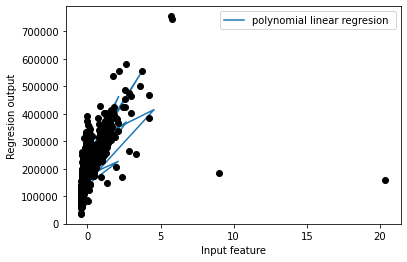

In [ ]:
line = np.linspace(-3,3,1000, endpoint=False).reshape(-1,1)
regLinear = svm.SVR(C=1000000, epsilon=0.2).fit(X_pca_train_pca_polinomial, y_train)
print("Train set Polynomial {:.2f}".format(regLinear.score(X_pca_train_pca_polinomial, y_train)))
print("Test set Polynomial {:.2f}".format(regLinear.score(X_pca_test_pca_polinomial, y_test)))
#line_poly = poly.transform(line)
plt.plot(X_pca_test_pca_polinomial[:,0], regLinear.predict(X_pca_test_pca_polinomial), label='polynomial linear regresion ')
plt.plot(X_pca_train_pca_polinomial[:,0],y_train, 'o', c='k')
plt.ylabel("Regresion output")
plt.xlabel("Input feature")
plt.legend(loc="best")

#GetDummies-One_Hot_Encoder - Binning

### A continuación se listan todas las características categóricas del dataset de valor para el proceso. Y más adelante se seleccionan cuales se utilizaran especificamente.

In [ ]:
colsTrainCategoricals = [ 'MSZoning',
'Street',
'LotShape',
'LandContour',
'Utilities',
'LotConfig',
'LandSlope',
'Neighborhood',
'Condition1',
'Condition2',
'BldgType',
'HouseStyle',
'RoofStyle',
'RoofMatl',
'Exterior1st',
'Exterior2nd',
'ExterQual',
'ExterCond',
'Foundation',
'BsmtQual',
'BsmtCond',
'BsmtExposure',
'BsmtFinType1',
'BsmtFinType2',
'Heating',
'HeatingQC',
'CentralAir',
'Electrical',
'KitchenQual',
'Functional',
'GarageType',
'GarageFinish',
'GarageQual',
'GarageCond',
'PavedDrive',
'SaleType',
'SaleCondition' ]

colsTestCategoricals = ['MSZoning',
'Street',
'LotShape',
'LandContour',
'Utilities',
'LotConfig',
'LandSlope',
'Neighborhood',
'Condition1',
'Condition2',
'BldgType',
'HouseStyle',
'RoofStyle',
'RoofMatl',
'Exterior1st',
'Exterior2nd',
'ExterQual',
'ExterCond',
'Foundation',
'BsmtQual',
'BsmtCond',
'BsmtExposure',
'BsmtFinType1',
'BsmtFinType2',
'Heating',
'HeatingQC',
'CentralAir',
'Electrical',
'KitchenQual',
'Functional',
'GarageType',
'GarageFinish',
'GarageQual',
'GarageCond',
'PavedDrive',
'SaleType',
'SaleCondition']

### Observamos primeramente las características originales después de un proceso de limpieza. Solo Para verificar

In [ ]:
print("Keys of train_one_hot:\n", train_one_hot.keys())
print("Keys of test_one_hot:\n", test_one_hot.keys())

Keys of train_one_hot:
 Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', 'GrLivArea', 'FullBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PavedDrive', 'MoSold', 'YrSold',
       'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object')
Keys of test_one_hot:
 Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 

### Definimos las característics que tendrá el dataset númerico,a el cual aplicaremos transformaciones y escalamiento para luego juntarlo con el hStack

In [ ]:
colsTrain = ['OverallQual','TotalBsmtSF','1stFlrSF','GrLivArea',
             'GarageCars','GarageArea']
X_train_numerical = train_one_hot[colsTrain]

### Definiendo train y test con las características categóricas listadas en la primera celda (el test es el original pero al final utilizaremos el X_test con split para validación y dejaremos el test como de pruebas)

In [ ]:
train_data = train_one_hot[colsTrainCategoricals]
test_data = test_one_hot[colsTestCategoricals]
print("train_data shape",train_data.shape)
print("test_data shape",test_data.shape)

train_data shape (1347, 37)
test_data shape (1339, 37)


In [ ]:
#Observamos los valores enteros por característica
for feature in train_data:
  print(train_data[feature].value_counts())


RL         1072
RM          191
FV           65
RH           11
C (all)       8
Name: MSZoning, dtype: int64
Pave    1342
Grvl       5
Name: Street, dtype: int64
Reg    836
IR1    461
IR2     40
IR3     10
Name: LotShape, dtype: int64
Lvl    1215
Bnk      52
HLS      48
Low      32
Name: LandContour, dtype: int64
AllPub    1346
NoSeWa       1
Name: Utilities, dtype: int64
Inside     964
Corner     245
CulDSac     91
FR2         43
FR3          4
Name: LotConfig, dtype: int64
Gtl    1274
Mod      61
Sev      12
Name: LandSlope, dtype: int64
NAmes      209
CollgCr    147
OldTown    100
Somerst     86
Gilbert     78
          ... 
BrDale      15
MeadowV     12
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, Length: 25, dtype: int64
Norm      1171
Feedr       63
Artery      43
RRAn        26
PosN        19
RRAe        10
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64
Norm      1333
Feedr        5
Artery       2
RRNn         2
PosN         2
Pos

### Obteniendo Dummy Varibles

In [ ]:
data_dummies = pd.get_dummies(train_data)
display(data_dummies)

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1456,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1457,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1458,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


### Definiendo X features el cuál será un dataset que tiene todas las dummy variables

In [ ]:
features = data_dummies.loc[:, 'MSZoning_C (all)':'SaleCondition_Partial']
# Extract NumPy arrays
X = features.values

### Probamos el resultado con una máquina de soporte vectorial

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0)

svmDumies = svm.SVR(C=1000000, epsilon=0.2).fit(X_train, y_train)
print("Training score: {:.2f}".format(svmDumies.score(X_train, y_train)))
print("Test score: {:.2f}".format(svmDumies.score(X_test, y_test)))

Training score: 0.97
Test score: 0.80


### One Hot Encode

Utilizaremos One Hot Encode para codificar nuestras variables categóricas y además, transformar los datos, esta celda mostrará un ejemplo de la tranformación sin embargo en la siguiente celda se detalla el proceso con un ColumnTransformer

In [ ]:
from sklearn.preprocessing import OneHotEncoder
# Setting sparse=False means OneHotEncode will return a numpy array, not a sparse matrix
ohe = OneHotEncoder(sparse=False)
print(ohe.fit_transform(train_data))


[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [ ]:
print(ohe.get_feature_names())


['x0_C (all)' 'x0_FV' 'x0_RH' 'x0_RL' 'x0_RM' 'x1_Grvl' 'x1_Pave' 'x2_IR1'
 'x2_IR2' 'x2_IR3' 'x2_Reg' 'x3_Bnk' 'x3_HLS' 'x3_Low' 'x3_Lvl'
 'x4_AllPub' 'x4_NoSeWa' 'x5_Corner' 'x5_CulDSac' 'x5_FR2' 'x5_FR3'
 'x5_Inside' 'x6_Gtl' 'x6_Mod' 'x6_Sev' 'x7_Blmngtn' 'x7_Blueste'
 'x7_BrDale' 'x7_BrkSide' 'x7_ClearCr' 'x7_CollgCr' 'x7_Crawfor'
 'x7_Edwards' 'x7_Gilbert' 'x7_IDOTRR' 'x7_MeadowV' 'x7_Mitchel'
 'x7_NAmes' 'x7_NPkVill' 'x7_NWAmes' 'x7_NoRidge' 'x7_NridgHt'
 'x7_OldTown' 'x7_SWISU' 'x7_Sawyer' 'x7_SawyerW' 'x7_Somerst'
 'x7_StoneBr' 'x7_Timber' 'x7_Veenker' 'x8_Artery' 'x8_Feedr' 'x8_Norm'
 'x8_PosA' 'x8_PosN' 'x8_RRAe' 'x8_RRAn' 'x8_RRNe' 'x8_RRNn' 'x9_Artery'
 'x9_Feedr' 'x9_Norm' 'x9_PosA' 'x9_PosN' 'x9_RRAe' 'x9_RRAn' 'x9_RRNn'
 'x10_1Fam' 'x10_2fmCon' 'x10_Duplex' 'x10_Twnhs' 'x10_TwnhsE'
 'x11_1.5Fin' 'x11_1.5Unf' 'x11_1Story' 'x11_2.5Fin' 'x11_2.5Unf'
 'x11_2Story' 'x11_SFoyer' 'x11_SLvl' 'x12_Flat' 'x12_Gable' 'x12_Gambrel'
 'x12_Hip' 'x12_Mansard' 'x12_Shed' 'x13_ClyTile' 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
ct = ColumnTransformer([("scaling", MinMaxScaler(), ['OverallQual','TotalBsmtSF','1stFlrSF','GrLivArea','GarageCars','GarageArea']),
     ("onehot", OneHotEncoder(sparse=False,handle_unknown='ignore'), [ 'MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
'Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','ExterQual','ExterCond','Foundation','BsmtQual',
'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','GarageType',
'GarageFinish','GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition' ])])

### Juntamos el dataset númerico con el dataset categórico y pormedio del ColumnTransformer obtenemos nuestro dataset de entrenamiento.

In [ ]:
X_combined = np.hstack([X_train_numerical, train_data])
df = pd.DataFrame(X_combined, columns = ['OverallQual','TotalBsmtSF','1stFlrSF','GrLivArea','GarageCars','GarageArea','MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
'Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','ExterQual','ExterCond','Foundation','BsmtQual',
'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','GarageType',
'GarageFinish','GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition'])

### Finalmente elegimos datos de trainin y test

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, Y, random_state=0)

ct.fit(X_train)
X_train_trans = ct.transform(X_train)
X_test_trans = ct.transform(X_test)
print(X_train.shape)
print(X_train_trans.shape)

(1010, 43)
(1010, 223)


### Probamos los resultados con una máquina de soporte vectorial

In [ ]:
svmColumnTransformer = svm.SVR(C=10000, epsilon=0.2).fit(X_train_trans, y_train)
print("Training score: {:.2f}".format(svmColumnTransformer.score(X_train_trans, y_train)))
print("Test score: {:.2f}".format(svmColumnTransformer.score(X_test_trans, y_test)))

Training score: 0.69
Test score: 0.72


Uno de los mayores desempeños ha sido dado por el uso de one hot code, muy cercano al desempeño de MinMaxScaler, usando máquinas de soporte vectoreal.
Es de esperar el resultado debido a que se están utilizando mucho más datos. Se espera que depronto aumentando la regularización puedan aumentar el desempeño en los datos de test.

Para el proceso de binning, por ahora no se considera, debido a que utilizamos únicamente variables categóricas, posiblemente proximamente en otro apartado se utilizan características con menos relación lineal, a las cuales podemos aplicarle la técnica de binning.

### Binning

In [ ]:
print("Keys of iris_dataset:\n", train_df.keys())
train_one_hot = train_df.copy()

Keys of iris_dataset:
 Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', 'GrLivArea', 'FullBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PavedDrive', 'MoSold', 'YrSold',
       'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object')


In [ ]:
print("Keys of iris_dataset:\n", test_df.keys())
test_one_hot = test_df.copy()

Keys of iris_dataset:
 Index(['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageCars',
       'GarageArea'],
      dtype='object')


# Conclusión

Se logró entrenar utilizando cada modelo lineal de machine learning, con un análisis oportuno de cada característica tanto en datos de entrenamiento como de validación

Se considera que tras aplicar Facets, esta herramienta permitió realizar una búsqueda exahustiva de las características que podrían traer sesgos al modelo de aprendizaje. Adicionalmente, cada característica pudo validarse puntualmente y gráficamente, observando, si era mejor deshacerse de la característica (Borrar la columna) o limpiar el dataset de pocas filas que posían datos vacíos y/o perdidos. Lo anterior se realizo por completo en el apartado de cleaning Data.

Se considera, que la visualizción (Scatter y mapa de calor) permitieron relacionar las características que poseían mayor correlación lineal con el target(Sales price). Lo anterior permitió obtener altos resultados en el desempeño del modelo con los diferentes algoritmos de aprendizaje y con muchas menos características que las iniciales, se pasaron de más de 70 características a solo 6. Y finalmente, aplicando reducción de dimensionalidad, se pudo proyectar estas seis características en 3 componentes principales. Teniendo así un X_train de únicamente 3 columnas. El proceso de escrito anteriormente se considera que fue vital para obtener un dataset que gener menos costo computacional; y que adicionalmente permitió un desempeño sobresaliente en todos los modelos de predicción lineales.

Por otro lado, se observa que las máquinas de soporte vectorial y de igual forma, los modelos de regresión con knneighbors fueron de los algoritmos con mejor desempeño. A esto se le suma las tranformaciones realizadas que permitieron enmarcar mejor el rango de los datos.

Finalmente, se considera un futuro escenario con el uso de one-Hot-Encoder y binning. Las cuales no fueron tomadas incialmente debido a la carga computacional que generaría la operación con un dataset de más de 70características. Sin embargo, en se considera que en un futuro el usar las variables categóricas, necesitaría del mismo proceso de análisis de correlación+ con el target, para determinar si éstas podrían unirse a X_train o definitivamente es mejor Trabajar con el modelo actual, haciendo uso de  las variables númericas que tuvieron mayor correlación.